## The forecasting model: Facebook’s Prophet
The most commonly used models for forecasting predictions are the autoregressive models. Briefly, the autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term).

Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. We will use this state-of-the-art model: the Prophet model. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.
The mathematical equation behind the Prophet model is defined as:

**y(t) = g(t) + s(t) + h(t) + e(t)**

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.

s(t) represents periodic changes (weekly, monthly, yearly).

h(t) represents the effects of holidays (recall: Holidays impact businesses).

e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

# Microsoft

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-04,306.239990,307.760010,303.399994,305.410004,302.923828,22519900
1,2023-05-05,305.720001,311.970001,304.269989,310.649994,308.121155,28181200
2,2023-05-08,310.130005,310.200012,306.089996,308.649994,306.137451,21318600
3,2023-05-09,308.000000,310.040009,306.309998,307.000000,304.500885,21340800
4,2023-05-10,308.619995,313.000000,307.670013,312.309998,309.767639,30078000


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,362.120833,365.139565,358.925079,362.137342,361.059880,2.446982e+07
std,37.377510,37.256668,37.097822,37.237131,37.898210,9.092788e+06
min,305.720001,307.760010,303.399994,305.410004,302.923828,1.017660e+07
25%,331.027489,333.319992,326.985001,329.687500,328.115448,1.913310e+07
50%,352.385010,357.755005,346.349991,353.939988,352.197433,2.233405e+07
75%,401.872490,405.240006,397.829994,402.112495,401.885193,2.701165e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,2023-05-04,305.410004
1,2023-05-05,310.649994
2,2023-05-08,308.649994
3,2023-05-09,307.000000
4,2023-05-10,312.309998


In [4]:
!pip install prophet

In [5]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/lm50eg23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/g3auca6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15694', 'data', 'file=/tmp/tmptwcgyvoa/lm50eg23.json', 'init=/tmp/tmptwcgyvoa/g3auca6_.json', 'output', 'file=/tmp/tmptwcgyvoa/prophet_modelgi0lyav1/prophet_model-20240516150647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


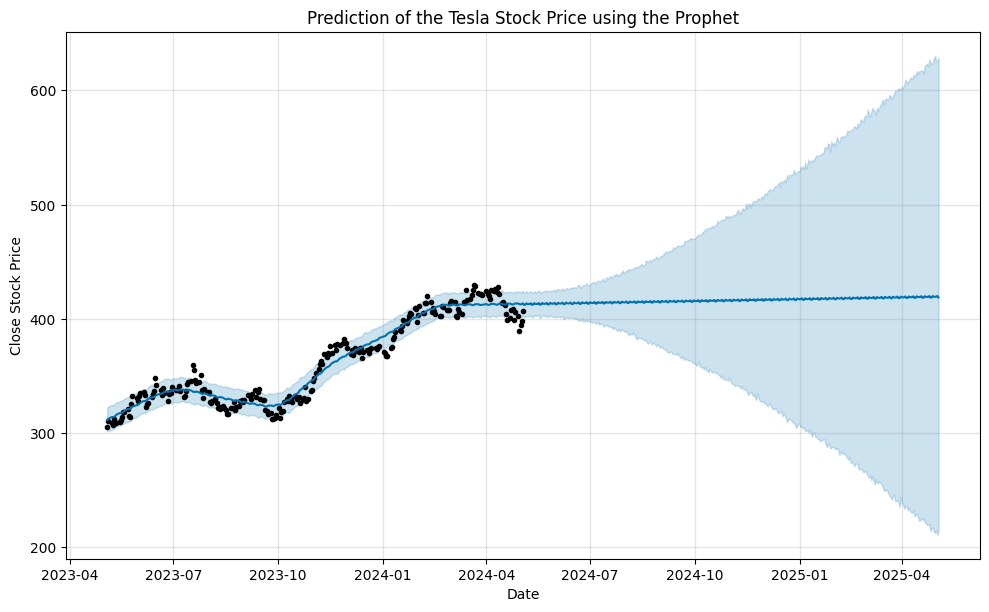

In [6]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Tesla Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

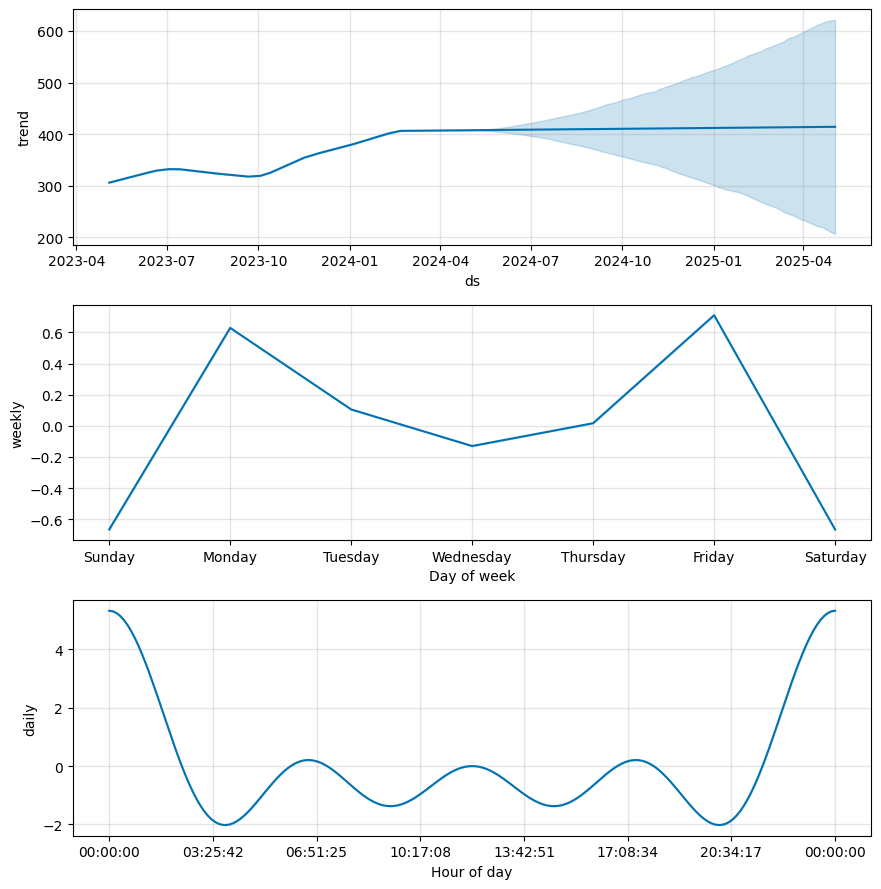

In [7]:
m.plot_components(prediction)
plt.show()

# CISCO

In [8]:
# Load the dataset using pandas
data = pd.read_csv("CSCO.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-04,45.770000,45.930000,45.560001,45.700001,44.321045,17748900
1,2023-05-05,46.119999,46.360001,45.919998,46.250000,44.854450,14315100
2,2023-05-08,46.439999,46.520000,46.090000,46.340000,44.941734,12000000
3,2023-05-09,45.980000,46.520000,45.919998,46.470001,45.067806,15221900
4,2023-05-10,46.700001,46.930000,46.150002,46.709999,45.300571,15625100


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,50.913065,51.276627,50.595893,50.954841,50.103904,1.883036e+07
std,2.621145,2.610726,2.618111,2.600992,2.437811,8.299172e+06
min,45.759998,45.930000,45.560001,45.700001,44.321045,7.338300e+06
25%,48.972500,49.462501,48.592498,49.009999,48.342498,1.441225e+07
50%,50.305000,50.585001,50.045000,50.335001,49.669474,1.715515e+07
75%,52.835000,53.299999,52.529999,52.967500,51.853454,1.987580e+07
max,57.820000,58.189999,57.389999,57.840000,56.520103,7.905780e+07


In [10]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,2023-05-04,45.700001
1,2023-05-05,46.250000
2,2023-05-08,46.340000
3,2023-05-09,46.470001
4,2023-05-10,46.709999


In [11]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/pxd3800n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/5mkvecn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80209', 'data', 'file=/tmp/tmptwcgyvoa/pxd3800n.json', 'init=/tmp/tmptwcgyvoa/5mkvecn0.json', 'output', 'file=/tmp/tmptwcgyvoa/prophet_modellede_l9q/prophet_model-20240516150650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


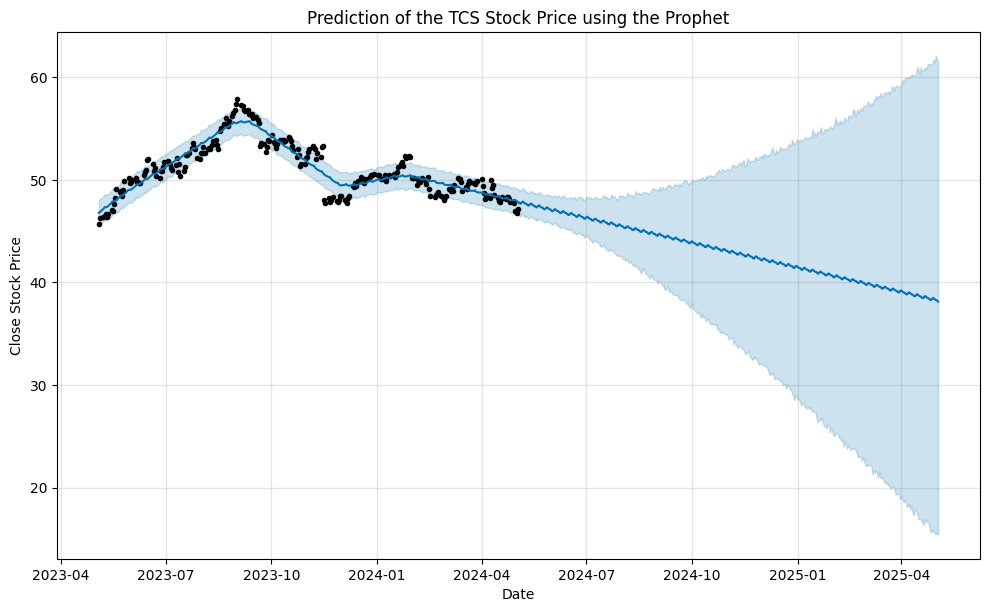

In [12]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the TCS Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

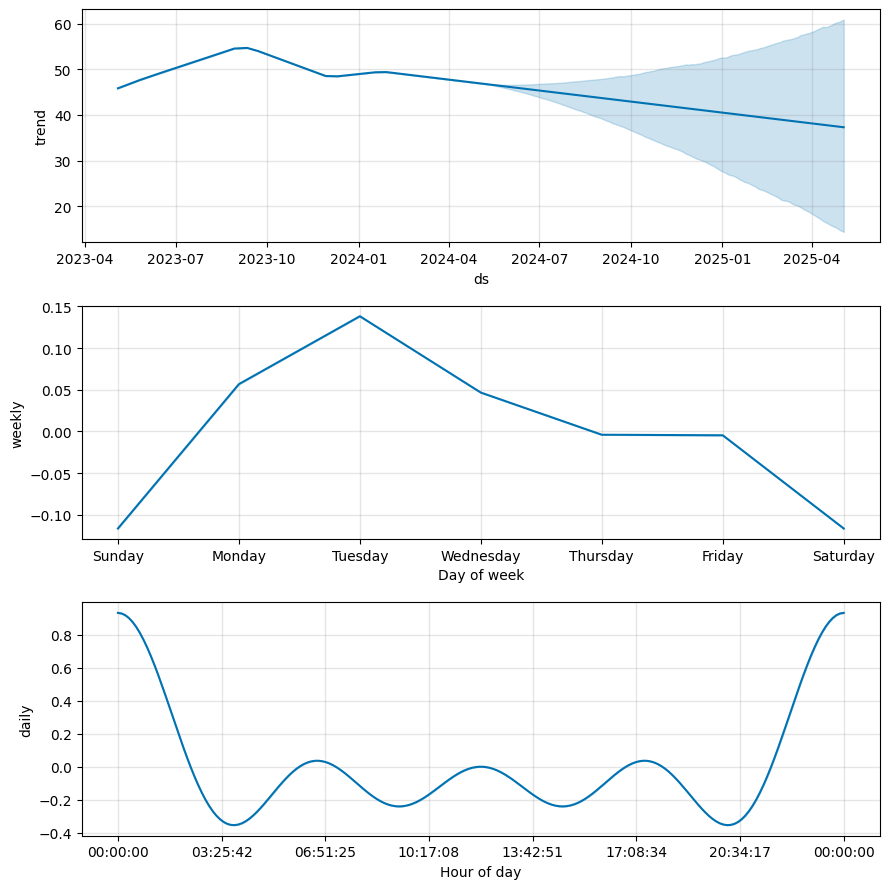

In [13]:
m.plot_components(prediction)
plt.show()

# S&P Global

In [14]:
# Load the dataset using pandas
data = pd.read_csv("SPGI.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-09,355.179993,359.100006,354.739990,355.269989,352.049255,863700
1,2023-05-10,357.100006,363.640015,357.100006,362.179993,358.896576,1407100
2,2023-05-11,362.920013,363.640015,358.109985,360.290009,357.023712,892600
3,2023-05-12,360.709991,361.980011,356.709991,359.339996,356.082306,750000
4,2023-05-15,359.570007,361.829987,357.359985,361.480011,358.202972,854200


In [15]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,403.744783,407.008380,400.819289,403.964111,402.544426,1.244010e+06
std,27.945043,27.574038,27.861472,27.940742,28.554275,4.925232e+05
min,344.799988,346.829987,340.489990,342.480011,341.027893,4.042000e+05
25%,385.170013,388.579987,382.700012,386.239990,383.976166,9.271000e+05
50%,409.250000,413.510010,407.529999,409.559998,409.328888,1.142100e+06
75%,427.470001,429.510010,423.320007,426.679993,426.140015,1.442200e+06
max,459.380005,461.160004,453.630005,459.720001,458.765472,3.790200e+06


In [16]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,2023-05-09,355.269989
1,2023-05-10,362.179993
2,2023-05-11,360.290009
3,2023-05-12,359.339996
4,2023-05-15,361.480011


In [17]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/2ncfdzkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/sn8ebzy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43148', 'data', 'file=/tmp/tmptwcgyvoa/2ncfdzkq.json', 'init=/tmp/tmptwcgyvoa/sn8ebzy4.json', 'output', 'file=/tmp/tmptwcgyvoa/prophet_modelcxixnkun/prophet_model-20240516150651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


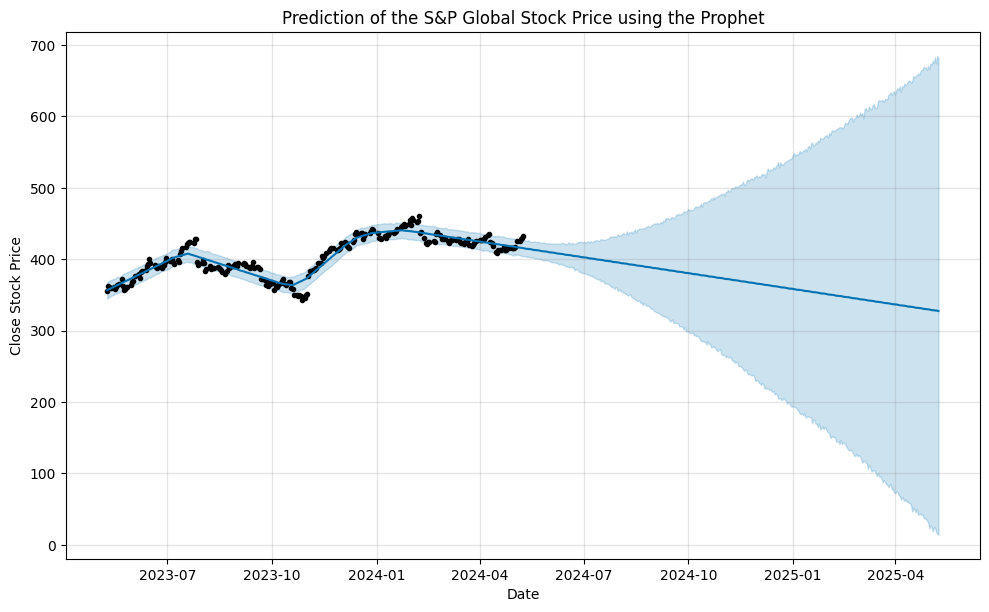

In [18]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the S&P Global Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

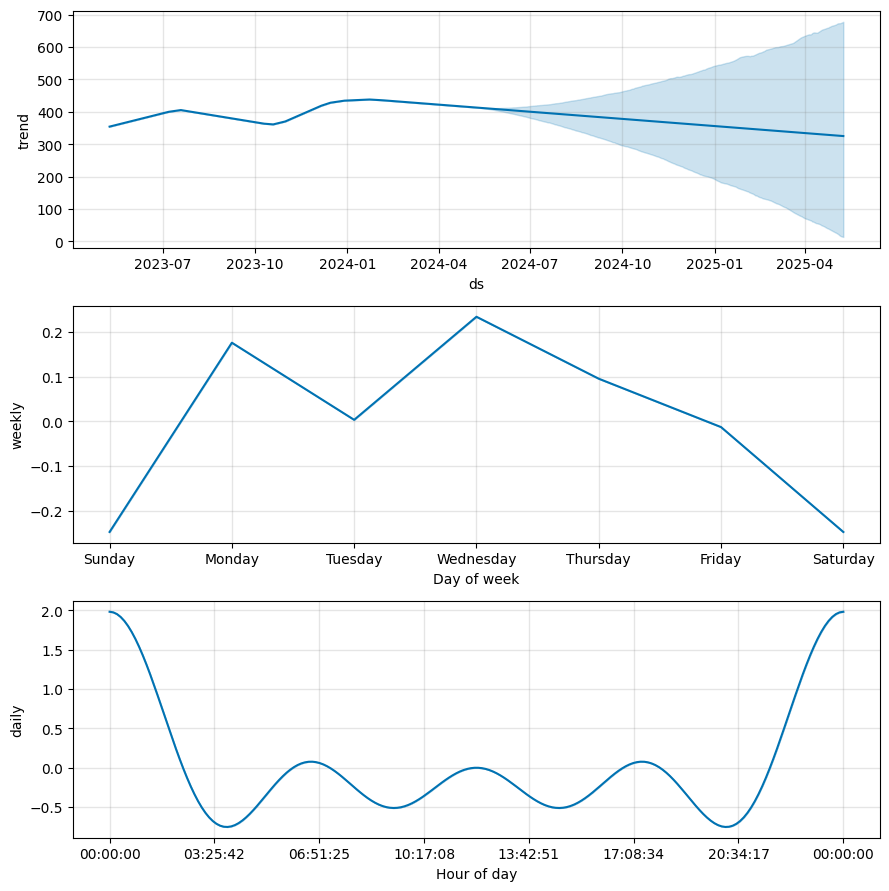

In [19]:
m.plot_components(prediction)
plt.show()

# BitCoin

In [20]:
# Load the dataset using pandas
data = pd.read_csv("BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-04,29031.304688,29353.185547,28694.039063,28847.710938,28847.710938,15548678514
1,2023-05-05,28851.480469,29668.908203,28845.509766,29534.384766,29534.384766,17936566518
2,2023-05-06,29538.859375,29820.126953,28468.966797,28904.623047,28904.623047,15913866714
3,2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
4,2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752


In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02
mean,39740.057130,40494.155585,39003.952800,39834.711166,39834.711166,2.195029e+10
std,14437.742141,14892.704692,13890.168106,14480.971514,14480.971514,1.412461e+10
min,25121.673828,25735.308594,24797.167969,25124.675781,25124.675781,5.331173e+09
25%,27637.861328,28045.999024,27173.012695,27640.265625,27640.265625,1.266682e+10
50%,34942.472656,35286.027344,34401.574219,35037.371094,35037.371094,1.752143e+10
75%,44262.552735,45737.773438,43644.914062,44638.095703,44638.095703,2.600370e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,1.028029e+11


In [22]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,2023-05-04,28847.710938
1,2023-05-05,29534.384766
2,2023-05-06,28904.623047
3,2023-05-07,28454.978516
4,2023-05-08,27694.273438


In [23]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/vtbd_vc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwcgyvoa/vbmi3q5v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24647', 'data', 'file=/tmp/tmptwcgyvoa/vtbd_vc3.json', 'init=/tmp/tmptwcgyvoa/vbmi3q5v.json', 'output', 'file=/tmp/tmptwcgyvoa/prophet_modelv7bofaid/prophet_model-20240516150654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


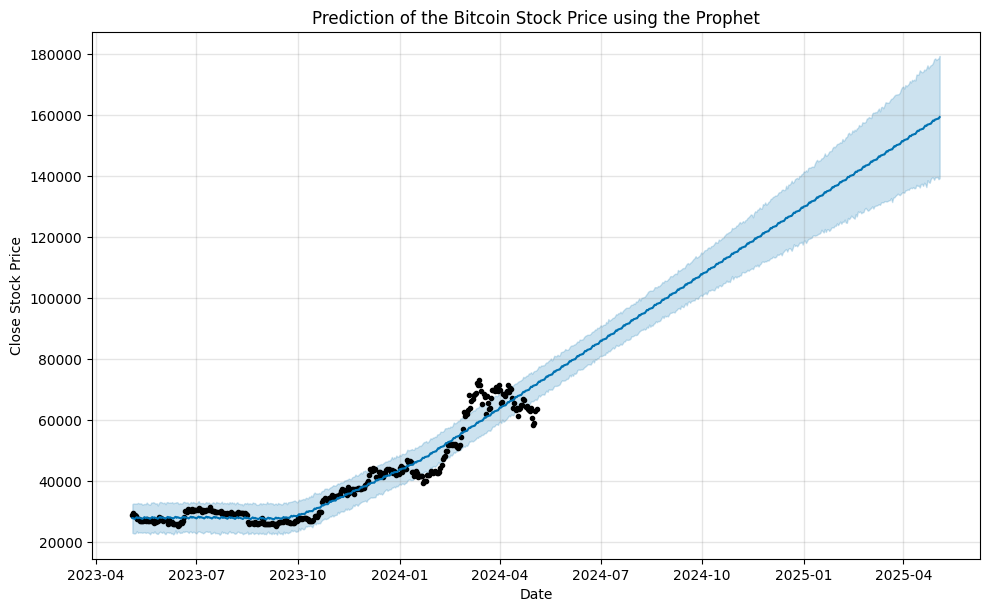

In [24]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

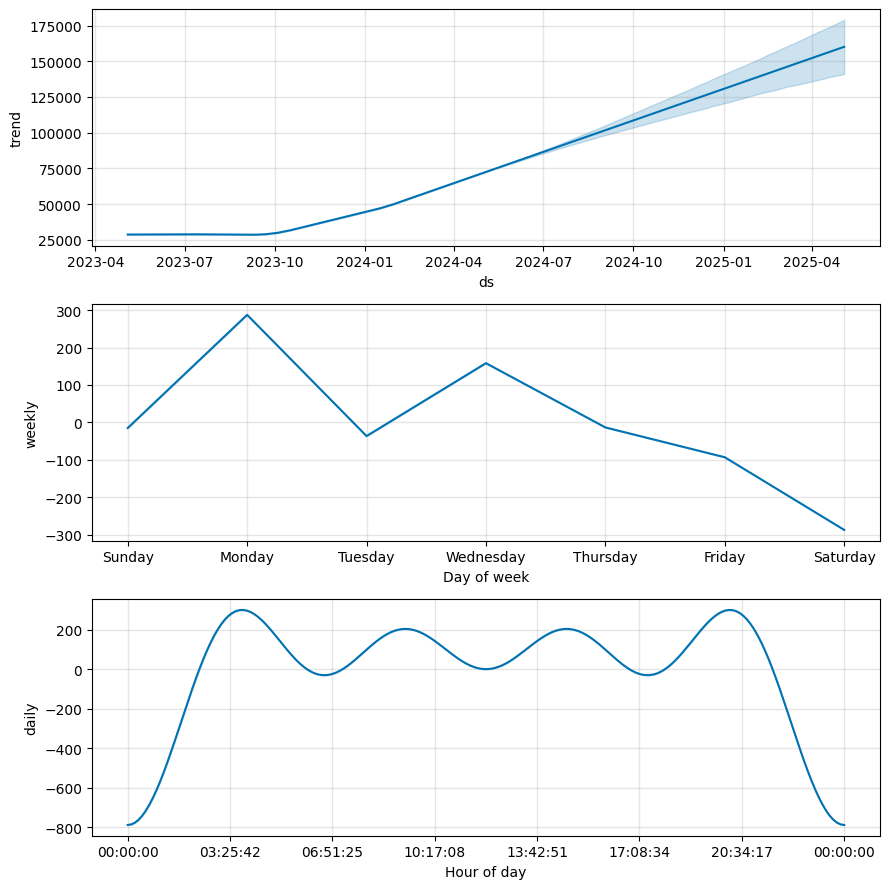

In [25]:
m.plot_components(prediction)
plt.show()